# Data Exploration

In [24]:
import pandas as pd

df = pd.read_csv("C:/Users/IdeaPad/Desktop/ACF/Machine Learning in Finance/3230.csv",header=0)
df=df.rename(columns = {'Unnamed: 0':'Date'})
df = df.drop(['Date'], axis=1)

# K-means Clustering

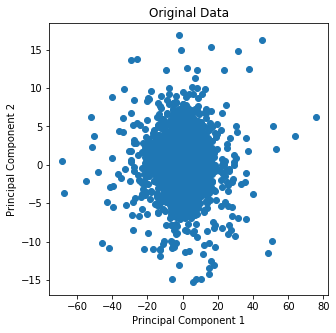

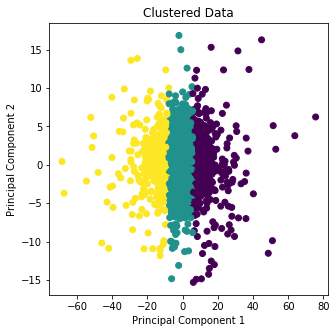

In [21]:
from sklearn.cluster import KMeans

pca = PCA(n_components=2).fit(data)
pca_2d = pca.transform(data)
pl.figure('Reference Plot')
pl.scatter(pca_2d[:, 0], pca_2d[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title('Original Data')
kmeans = KMeans(n_clusters=3, random_state=111)
kmeans.fit(data)
pl.figure('K-means with 3 clusters')
pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title('Clustered Data')

pl.show()

# Silhouette Ceofficient

In [22]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.2787786148444873
For n_clusters = 3 The average silhouette_score is : 0.3001364299136892
For n_clusters = 4 The average silhouette_score is : 0.22473161171328462
For n_clusters = 5 The average silhouette_score is : 0.19403344366540534
For n_clusters = 6 The average silhouette_score is : 0.15056591442286257
For n_clusters = 7 The average silhouette_score is : 0.11185251823268508
For n_clusters = 8 The average silhouette_score is : 0.11425177141640204
For n_clusters = 9 The average silhouette_score is : 0.10091271650659658
For n_clusters = 10 The average silhouette_score is : 0.09902535220461549


# Correlation Matrix

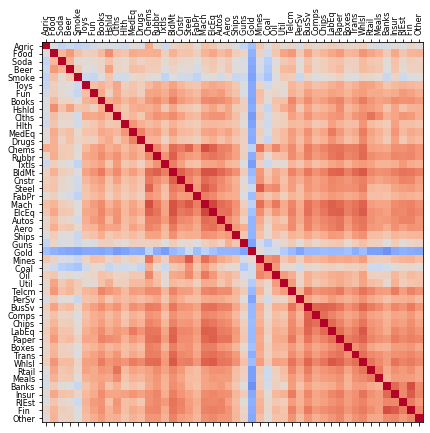

In [12]:
# #Find correlation matrix, i.e. the "distances" between each stock
corr = data.corr()
size = 7
fig, ax = plt.subplots(figsize=(size, size))
ax.matshow(corr,cmap=cm.get_cmap('coolwarm'), vmin=0,vmax=1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical', fontsize=8);
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=8);

# Dendrogram

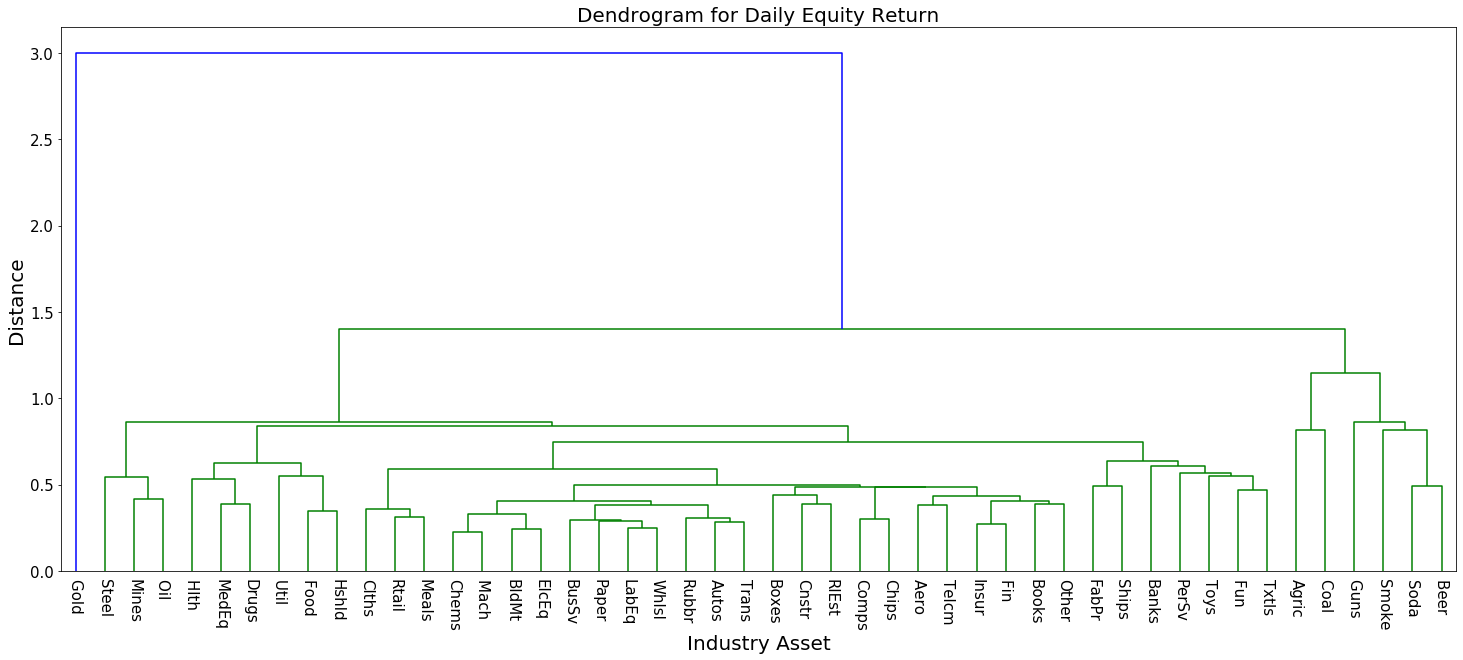

In [19]:
import matplotlib.cm as cm
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import pylab as pl
from scipy.cluster.hierarchy import dendrogram, linkage
from datetime import datetime

Z = linkage(corr, 'average')
c, coph_dists = cophenet(Z, pdist(corr))


# Dendogram
plt.figure(figsize=(25, 10))
labelsize=20
ticksize=15
plt.title('Dendrogram for Daily Equity Return', fontsize=labelsize)
plt.xlabel('Industry Asset', fontsize=labelsize)
plt.ylabel('Distance', fontsize=labelsize)
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels = corr.columns
)
pl.yticks(fontsize=ticksize)
pl.xticks(rotation=-90, fontsize=ticksize)
plt.savefig('dendogram.png')
plt.show()

# Explained Variance

array([0.68009188, 0.04043125, 0.032902  , 0.01555456, 0.01443294])

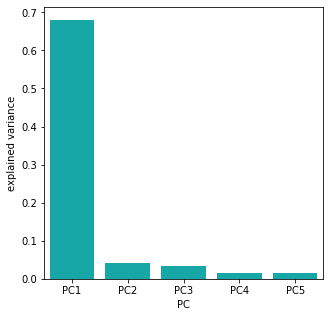

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
principalComponents = pca.fit_transform(scaled_df)
d = pd.DataFrame({'explained variance':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4','PC5']})
mpl.rcParams['figure.figsize'] = (5,5)
sns.barplot(x='PC',y="explained variance", 
           data=d, color="c");

pca.explained_variance_ratio_

# Biplot

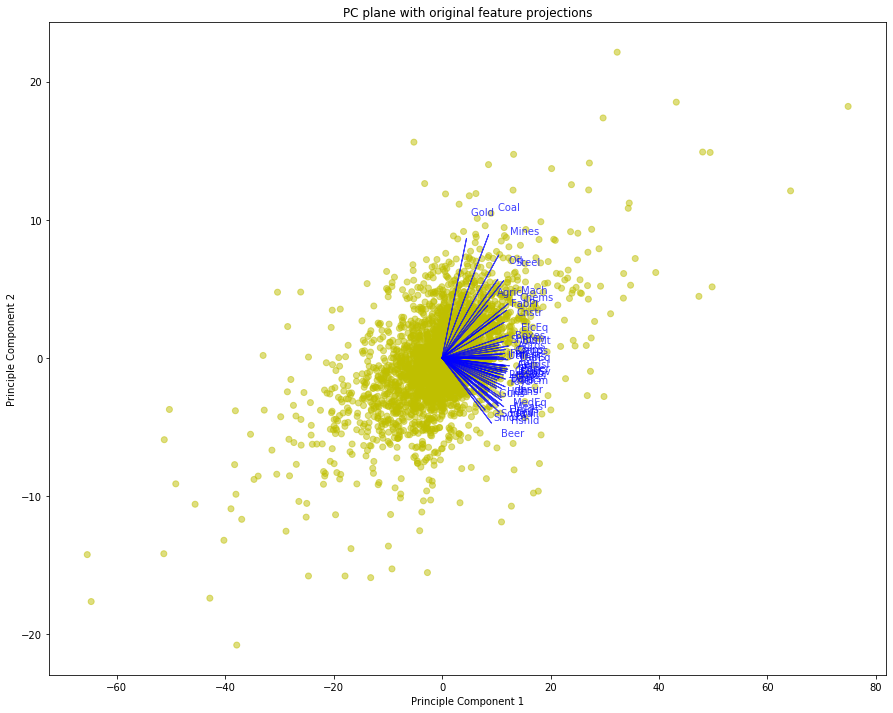

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib as mpl

# Standardizing the features

x = StandardScaler().fit_transform(data.values)
scaled_df = pd.DataFrame(x, index=data.index, columns=data.columns)


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_df)

def draw_vectors(transformed_features, components_, columns):
    """
    This funtion will project your *original* features
    onto your principal component feature-space, so that you can
    visualize how "important" each one was in the
    multi-dimensional scaling
    """

    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ax = plt.axes()

    for i in range(num_columns):
    # Use an arrow to project each original feature as a
    # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax

T = pca.transform(data)
ax = draw_vectors(T, pca.components_, data.columns.values)
T_df = pd.DataFrame(T)
T_df.columns = ['component1', 'component2']

T_df['color'] = 'y'


plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.title('PC plane with original feature projections')
plt.scatter(T_df['component1'], T_df['component2'], color=T_df['color'], alpha=0.5)
mpl.rcParams['figure.figsize'] = (12,12)
plt.savefig('biplot.png')
plt.show()